In [29]:
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
import librosa

In [50]:
pruh_path = "../data/production/production_syl1_pruh.wav"
duc_path  = "../data/production/production_syl2_duc.wav"
shun_path = "../data/production/production_syl3_shun.wav"

In [48]:
audio, sr = sf.read(pruh_path)
if audio.ndim > 1:
    audio = audio.mean(axis=1)
audio_trim, _ = librosa.effects.trim(audio, top_db=25) # top_db can change, lower db means cutting off more..

In [51]:
# frame_length -> much many seconds we are looking at once?
# hop_length -> how much we are moving each snapshot?
# by having hop_length smaller than frame_length -> we are having overlapping snapshots, so we cover more basis
rms = librosa.feature.rms(
    y=audio_trim,
    frame_length=int(sr * 0.025),  # 25 ms
    hop_length=int(sr * 0.010)      # 10 ms
)

In [58]:
0.025/25

0.001

In [73]:
def peak_rms(path,top_db = 25,frame_len = 25, hop_len = 10):
    # read in audio file, if multiple channels, mean down to 1 channel
    MS_CONVERT_CONST = 0.001
    audio, sr = sf.read(path)
    if audio.ndim > 1:
        audio = audio.mean(axis=1)

    # trim ends of silence
    audio_trim, _ = librosa.effects.trim(audio, top_db=top_db)

    # compute rms peak range based on given frame_len and hop_len
    fl = MS_CONVERT_CONST * frame_len
    hl = MS_CONVERT_CONST * hop_len

    # returns all rms values across all frame snapshots
    rms_times = librosa.feature.rms(
    y=audio_trim,
    frame_length=int(sr * fl),
    hop_length=int(sr * hl)
    )

    return float(np.max(rms_times))
    

In [74]:
pruh_rms = peak_rms(pruh_path)
duc_rms = peak_rms(duc_path)
shun_rms = peak_rms(shun_path)
pruh_rms,duc_rms,shun_rms

(0.016425371170043945, 0.018130432814359665, 0.011760074645280838)

In [ ]:
duc_rms

In [57]:
np.max(rms)

np.float32(0.016425371)

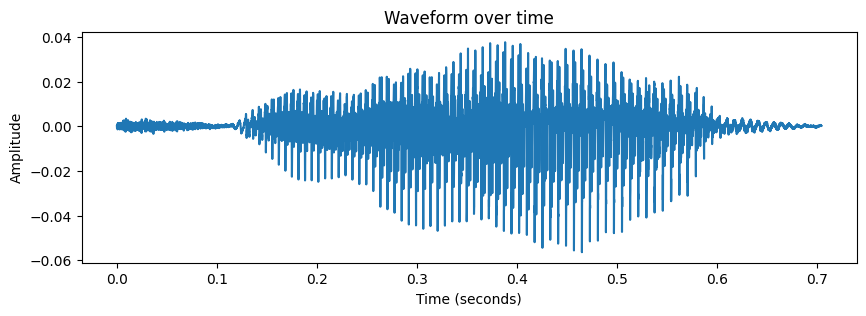

In [54]:
t = np.arange(len(audio_trim)) / sr

plt.figure(figsize=(10, 3))
plt.plot(t, audio_trim)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Waveform over time")
plt.show()

In [23]:
# def analyze(path):
#     audio, sr = sf.read(path)
#     print(a
#     # ensure mono
#     if audio.ndim > 1:
#         audio = audio.mean(axis=1)

#     duration = len(audio) / sr
#     rms = np.sqrt(np.mean(audio**2)
#     return duration, rms

# pruh_path = "../data/production/production_syl1_pruh.wav"
# duc_path  = "../data/production/production_syl2_duc.wav"

# pruh_dur, pruh_rms = analyze(pruh_path)
# duc_dur, duc_rms   = analyze(duc_path)

# print(f"PRUH → duration={pruh_dur:.3f}s, RMS={pruh_rms:.4f}")
# print(f"DUC  → duration={duc_dur:.3f}s, RMS={duc_rms:.4f}")

# if duc_rms > pruh_rms:
#     print("Stress looks correct: DUC is stronger")
# else:
#     print("Stress looks wrong: PRUH is too strong")

In [21]:
# what does "audio" even look like? -> audio is dense oscillations -> bigger vertical range = louder
# audio,sr = sf.read(pruh_path)
# audio = audio[17000:17500]
# plt.figure(figsize=(10, 3))
# plt.plot(audio)
# plt.title("Waveform")
# plt.xlabel("Sample index")
# plt.ylabel("Amplitude")
# plt.show()

In [22]:
# We record 16,000 samples every 1 second (sr) so time = len(audio) / sample rate
# t = np.arange(len(audio)) / sr

# plt.figure(figsize=(10, 3))
# plt.plot(t, audio)
# plt.xlabel("Time (seconds)")
# plt.ylabel("Amplitude")
# plt.title("Waveform over time")
# plt.show()

In [27]:
# import numpy as np
# import soundfile as sf

# def frame_rms(x, frame_len, hop_len):
#     # Pad so we can frame cleanly
#     n = len(x)
#     if n < frame_len:
#         x = np.pad(x, (0, frame_len - n))
#         n = len(x)
#     n_frames = 1 + (n - frame_len) // hop_len
#     rms = np.empty(n_frames, dtype=np.float32)
#     for i in range(n_frames):
#         s = i * hop_len
#         frame = x[s:s+frame_len]
#         rms[i] = np.sqrt(np.mean(frame * frame) + 1e-12)
#     return rms

# def trim_silence_rms(audio, sr, top_db=35, frame_ms=25, hop_ms=10):
#     """
#     Keeps regions whose frame RMS is within `top_db` of the max frame RMS.
#     This is a common, simple VAD-style gate.
#     """
#     frame_len = int(sr * frame_ms / 1000)
#     hop_len   = int(sr * hop_ms / 1000)

#     rms = frame_rms(audio, frame_len, hop_len)
#     rms_db = 20 * np.log10(rms + 1e-12)
#     threshold = rms_db.max() - top_db

#     keep = rms_db > threshold
#     if not np.any(keep):
#         return audio  # nothing detected, return original to avoid crashing

#     # Convert kept frame indices -> sample indices
#     first = np.argmax(keep)
#     last  = len(keep) - 1 - np.argmax(keep[::-1])

#     start = first * hop_len
#     end   = min(len(audio), last * hop_len + frame_len)

#     return audio[start:end]

# def analyze(path, top_db=35):
#     audio, sr = sf.read(path)
#     # ensure mono
#     if audio.ndim > 1:
#         audio = audio.mean(axis=1)

#     raw_dur = len(audio) / sr
#     raw_rms = np.sqrt(np.mean(audio**2) + 1e-12)

#     trimmed = trim_silence_rms(audio, sr, top_db=top_db)
#     trim_dur = len(trimmed) / sr
#     trim_rms = np.sqrt(np.mean(trimmed**2) + 1e-12)
#     trim_peak_rms = np.max(np.abs(trimmed))  # quick proxy for peak energy

#     return {
#         "sr": sr,
#         "raw_dur": raw_dur,
#         "raw_rms": raw_rms,
#         "trim_dur": trim_dur,
#         "trim_rms": trim_rms,
#         "trim_peak": trim_peak_rms,
#     }

# pruh_path = "../data/production/production_syl1_pruh.wav"
# duc_path  = "../data/production/production_syl2_duc.wav"

# pr = analyze(pruh_path, top_db=35)
# du = analyze(duc_path,  top_db=35)

# print("PRUH:", pr)
# print("DUC :", du)

# print(f"\nTRIMMED PRUH → duration={pr['trim_dur']:.3f}s, RMS={pr['trim_rms']:.4f}")
# print(f"TRIMMED DUC  → duration={du['trim_dur']:.3f}s, RMS={du['trim_rms']:.4f}")

# if du["trim_rms"] > pr["trim_rms"]:
#     print("After trimming: DUC is stronger (expected)")
# else:
#     print("After trimming: PRUH still stronger (check segmentation/threshold)")

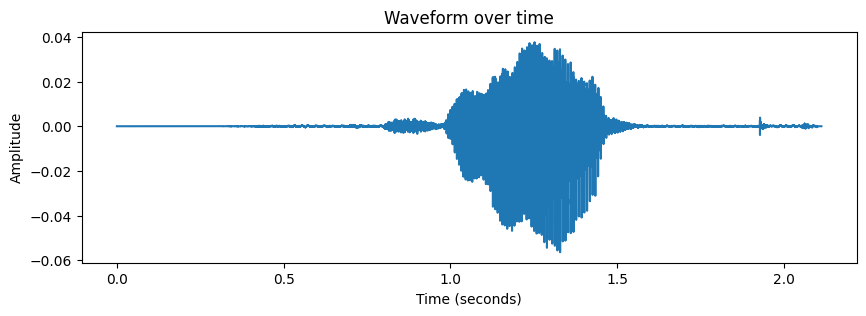

In [25]:
audio,sr = sf.read(pruh_path)
t = np.arange(len(audio)) / sr

plt.figure(figsize=(10, 3))
plt.plot(t, audio)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Waveform over time")
plt.show()

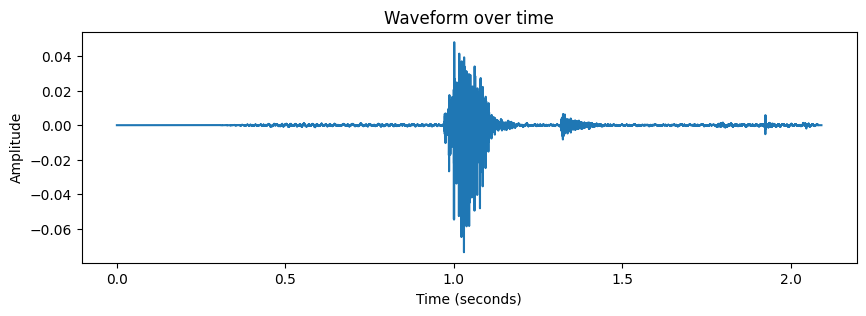

In [26]:
audio,sr = sf.read(duc_path)
t = np.arange(len(audio)) / sr

plt.figure(figsize=(10, 3))
plt.plot(t, audio)
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.title("Waveform over time")
plt.show()